In [ ]:
"""
Simple Linear Regression Model


Use the boston housing data set to perform the following activities:

1.    Consider the column, ‘RM’, as predictor, and ‘MEDV’ as the target variable

2.    Visualize the association between the predictor and the target using scatter plot.

3.    Split the data into train and test datasets, in the ratio of 67:33.

4.    Build a Linear Regression model using training dataset, to predict the target variable.

5.    Observe the coefficient and intercept values for the model.

6.    Evaluate the model using mean squared error values and R-squared values on the training and the testing datasets.

"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston_housing = pd.read_csv("../../datasets/boston_housing.csv")

In [3]:
"""
Dataset relating to the median price of a house in Boston (MEDV), given factors such as crime rate, zone, age, 
district etc.
"""

boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston_housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


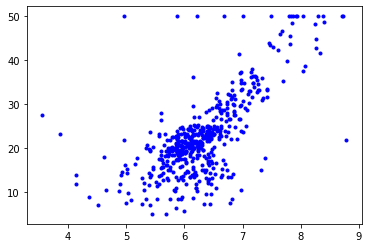

In [6]:
# visualise relationship between RM and MEDV

plt.scatter(boston_housing["RM"], boston_housing["MEDV"], color = "blue", marker = ".")

In [14]:
# select predictor/target variables

x = boston_housing[["RM"]]
y = boston_housing["MEDV"]

from sklearn import preprocessing

x_standardized = preprocessing.scale(x)
y_standardized = preprocessing.scale(y)

In [15]:
# build model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_standardized,y_standardized,train_size = 0.67, random_state = 0)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print("Model coefficient: ", model.coef_)
print("Model intercept: ", model.intercept_)

Model coefficient:  [0.70966947]
Model intercept:  0.0034963939787722477


In [17]:
# evaluate using R2

R2_train = model.score(x_train,y_train)
R2_test = model.score(x_test,y_test)

print("R2_train: ", R2_train)
print("R2_test: ", R2_test)

R2_train:  0.4986956956861112
R2_test:  0.44670868585676543


In [18]:
# evaluate using RMSE

from sklearn.metrics import mean_squared_error

train_predictions = model.predict(x_train)
RMSE_train = mean_squared_error(y_train,train_predictions)**0.5

print("RMSE_train: ",RMSE_train)

test_predictions = model.predict(x_test)
RMSE_test = mean_squared_error(y_test, test_predictions)**0.5

print("RMSE_test: ",RMSE_test)

RMSE_train:  0.7147882683600171
RMSE_test:  0.7269131924337378


In [ ]:
SSR_test = sum((model.predict(x_test) - y_test.mean())**2)
SST_test = sum((y_test - y_test.mean())**2)
SSE_test = sum((y_test - model.predict(x_test))**2)

myRMSE_test = np.sqrt(SSE_test/y_test.shape[0])
print(myRMSE_test)

#myR2_test = SSR_test/SST_test
#print(myR2_test)